In [1]:
import yfinance as yf
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import personfunctions as pf

In [2]:
start_date = datetime.datetime(2022,7,28)
symbols_list=['VOO','PDBC','XLRE','VCIT']
klines_list=[]
intial_prices_list=[]
current_prices_list=[]
for symbol in symbols_list:
    ticker=yf.Ticker(symbol)
    kline=ticker.history(start=start_date)
    kline=pf.get_TWAP_price(kline)
    klines_list.append(kline)
    intial_prices_list.append(kline['Open'].iloc[0])
    current_prices_list.append(kline['Close'].iloc[-1])



In [3]:
#print(klines_list)
#print(intial_prices_list)
#print(current_prices_list)

note that all the calculations are approximated

In [4]:

ETFs_df=pd.DataFrame()
cash=4000 #in usd
rebalance_diff=0.05
ETFs_df['symbol']=symbols_list
ETFs_df['ratio']=[0.5,0.3,0.1,0.1]
ETFs_df['intial_price']=intial_prices_list
ETFs_df['intial_price']=round(ETFs_df['intial_price'],3)
ETFs_df['intial_cash']=ETFs_df['ratio']*cash
ETFs_df['initial_amount']=round(ETFs_df['intial_cash']/ETFs_df['intial_price'],3)
ETFs_df['current_price']=current_prices_list
ETFs_df['current_price']=round(ETFs_df['current_price'],3)
ETFs_df['current_cash']=round(ETFs_df['current_price']*ETFs_df['initial_amount'],3)
total_current_cash=ETFs_df['current_cash'].sum()
ETFs_df['current_ratio']=round(ETFs_df['current_cash']/total_current_cash,4)
ETFs_df['diff_ratio']=ETFs_df['current_ratio']-ETFs_df['ratio']
ETFs_df['rebalance?']=np.where(abs(ETFs_df['diff_ratio'])<=rebalance_diff,'No','Yes')
print(ETFs_df)




  symbol  ratio  intial_price  intial_cash  initial_amount  current_price  \
0    VOO    0.5       360.902       2000.0           5.542         336.98   
1   PDBC    0.3        17.320       1200.0          69.284          16.57   
2   XLRE    0.1        42.047        400.0           9.513          36.68   
3   VCIT    0.1        80.958        400.0           4.941          76.48   

   current_cash  current_ratio  diff_ratio rebalance?  
0      1867.543         0.4990     -0.0010         No  
1      1148.036         0.3068      0.0068         No  
2       348.937         0.0932     -0.0068         No  
3       377.888         0.1010      0.0010         No  


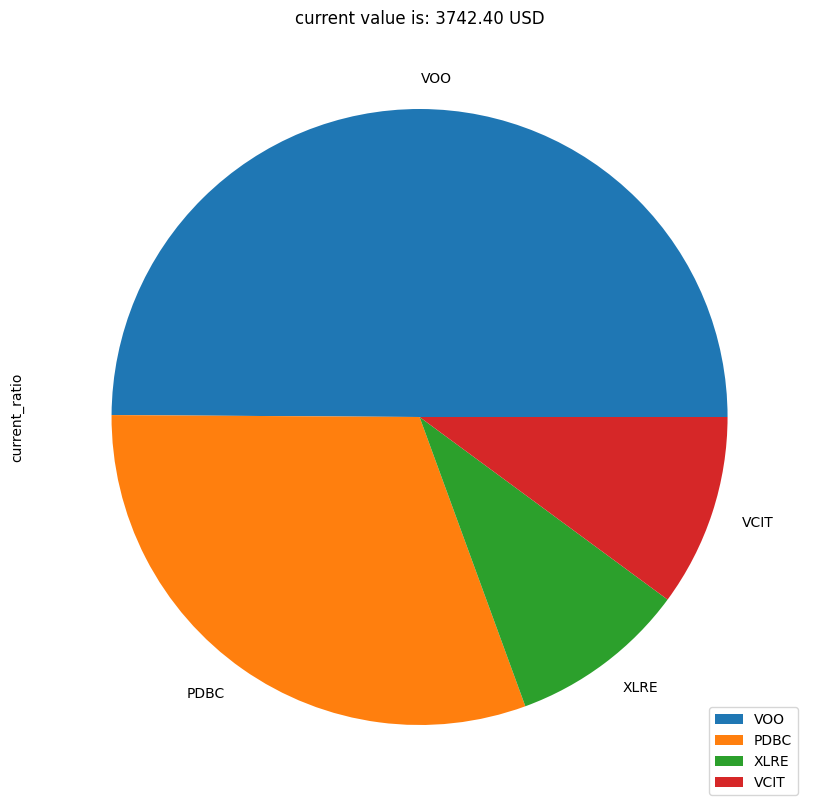

In [5]:
#ETFs_df.set_index(['symbol'],inplace=True)
plot=ETFs_df.set_index(['symbol']).plot.pie(y='current_ratio',figsize=(10,10),\
    title='current value is: {:.2f} USD'.format(total_current_cash))
plt.savefig('Risk_Harvesting_Premium.png')
plt.show()